## Merging groupby-nominees with template


In [1]:
import requests
import json
import numpy as np
import pandas as pd
from pandas import json_normalize

In [2]:
df = pd.read_csv('nominees.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   properties.name      184 non-null    object 
 1   properties.headline  184 non-null    float64
 2   properties.article   184 non-null    object 
dtypes: float64(1), object(2)
memory usage: 5.5+ KB


In [4]:
df=df.rename(columns={'properties.headline': 'headline', 'properties.article': 'article'})

In [5]:
df.head()

properties.name  headline  \
0       Ohio Northern       4.0   
1    Georgia Northern       3.0   
2  Washington Western       4.0   
3       New Hampshire       1.0   
4       Ohio Northern       4.0   

                                             article  
0  Bridget Meehan Brennan, Charles Esque Fleming,...  
1  Victoria Marie Calvert, Sarah Elisabeth Geragh...  
2  John H. Chun, Kymberly Evanson, Jamal Whitehea...  
3                                Samantha D. Elliott  
4  Bridget Meehan Brennan, Charles Esque Fleming,...

In [7]:
with open('US_JD_simply.json') as json_data:
    geometry_data = json.load(json_data)

In [8]:
map = pd.DataFrame.from_dict(json_normalize(geometry_data['features']), orient='columns')
map.head()

type  id geometry.type  \
0  Feature   1       Polygon   
1  Feature   2       Polygon   
2  Feature   3  MultiPolygon   
3  Feature   4  MultiPolygon   
4  Feature   5       Polygon   

                                geometry.coordinates properties.ABBR  \
0  [[[-85.30506134, 33.482673645], [-85.263984679...             ALM   
1  [[[-87.9870452879999, 35.0075187680001], [-87....             ALN   
2  [[[[-88.1121139529999, 30.2584381100002], [-88...             ALS   
3  [[[[-179.098083496, 51.3043937680002], [-179.0...              AK   
4  [[[-109.044883728, 36.9986305240002], [-109.04...              AZ   

  properties.DISTRICT  properties.SQ_Miles  properties.Shape_Leng  \
0      ALABAMA MIDDLE         1.557104e+04               9.918902   
1    ALABAMA NORTHERN         2.279241e+04              12.526683   
2    ALABAMA SOUTHERN         3.672870e+04              14.291408   
3              ALASKA         2.130451e+07             787.366223   
4             ARIZONA         1.140598e+05              23.752602   

   properties.Shape_Area properties.District_N  properties.Shape__Are  \
0               3.851034                    11               3.851034   
1               5.752874                    11               5.752874   
2               3.267182                    11               3.267182   
3             279.696379                     9             279.696379   
4              28.930993                     9              28.930993   

   properties.Shape__Len  
0               9.918902  
1              12.526683  
2              14.291408  
3             787.366223  
4              23.752602

In [9]:
map['properties.name'] = map['properties.DISTRICT'].apply(lambda x: x.title())
map.head()

type  id geometry.type  \
0  Feature   1       Polygon   
1  Feature   2       Polygon   
2  Feature   3  MultiPolygon   
3  Feature   4  MultiPolygon   
4  Feature   5       Polygon   

                                geometry.coordinates properties.ABBR  \
0  [[[-85.30506134, 33.482673645], [-85.263984679...             ALM   
1  [[[-87.9870452879999, 35.0075187680001], [-87....             ALN   
2  [[[[-88.1121139529999, 30.2584381100002], [-88...             ALS   
3  [[[[-179.098083496, 51.3043937680002], [-179.0...              AK   
4  [[[-109.044883728, 36.9986305240002], [-109.04...              AZ   

  properties.DISTRICT  properties.SQ_Miles  properties.Shape_Leng  \
0      ALABAMA MIDDLE         1.557104e+04               9.918902   
1    ALABAMA NORTHERN         2.279241e+04              12.526683   
2    ALABAMA SOUTHERN         3.672870e+04              14.291408   
3              ALASKA         2.130451e+07             787.366223   
4             ARIZONA         1.140598e+05              23.752602   

   properties.Shape_Area properties.District_N  properties.Shape__Are  \
0               3.851034                    11               3.851034   
1               5.752874                    11               5.752874   
2               3.267182                    11               3.267182   
3             279.696379                     9             279.696379   
4              28.930993                     9              28.930993   

   properties.Shape__Len   properties.name  
0               9.918902    Alabama Middle  
1              12.526683  Alabama Northern  
2              14.291408  Alabama Southern  
3             787.366223            Alaska  
4              23.752602           Arizona

In [10]:
joined_df = pd.merge(map, df, how='inner', on='properties.name')
joined_df.head()

type  id geometry.type  \
0  Feature   9  MultiPolygon   
1  Feature   9  MultiPolygon   
2  Feature   9  MultiPolygon   
3  Feature   9  MultiPolygon   
4  Feature  10  MultiPolygon   

                                geometry.coordinates properties.ABBR  \
0  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
1  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
2  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
3  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
4  [[[[-122.3360672, 37.7953338620002], [-122.302...             CAN   

   properties.DISTRICT  properties.SQ_Miles  properties.Shape_Leng  \
0   CALIFORNIA EASTERN            91785.949              32.204502   
1   CALIFORNIA EASTERN            91785.949              32.204502   
2   CALIFORNIA EASTERN            91785.949              32.204502   
3   CALIFORNIA EASTERN            91785.949              32.204502   
4  CALIFORNIA NORTHERN            26734.821              29.120485   

   properties.Shape_Area properties.District_N  properties.Shape__Are  \
0              23.632805                     9              23.632805   
1              23.632805                     9              23.632805   
2              23.632805                     9              23.632805   
3              23.632805                     9              23.632805   
4               5.579357                     9               5.579357   

   properties.Shape__Len      properties.name  headline  \
0              32.204502   California Eastern       4.0   
1              32.204502   California Eastern       4.0   
2              32.204502   California Eastern       4.0   
3              32.204502   California Eastern       4.0   
4              29.120485  California Northern       7.0   

                                             article  
0  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...  
1  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...  
2  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...  
3  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...  
4  Judge Jacqueline Corley, Judge Trina Thompson,...

In [11]:
joined_df['properties.headline'] = joined_df['headline'].apply(lambda x: "The number of nominee/s in this district is " + str(x))
joined_df.head()

type  id geometry.type  \
0  Feature   9  MultiPolygon   
1  Feature   9  MultiPolygon   
2  Feature   9  MultiPolygon   
3  Feature   9  MultiPolygon   
4  Feature  10  MultiPolygon   

                                geometry.coordinates properties.ABBR  \
0  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
1  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
2  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
3  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
4  [[[[-122.3360672, 37.7953338620002], [-122.302...             CAN   

   properties.DISTRICT  properties.SQ_Miles  properties.Shape_Leng  \
0   CALIFORNIA EASTERN            91785.949              32.204502   
1   CALIFORNIA EASTERN            91785.949              32.204502   
2   CALIFORNIA EASTERN            91785.949              32.204502   
3   CALIFORNIA EASTERN            91785.949              32.204502   
4  CALIFORNIA NORTHERN            26734.821              29.120485   

   properties.Shape_Area properties.District_N  properties.Shape__Are  \
0              23.632805                     9              23.632805   
1              23.632805                     9              23.632805   
2              23.632805                     9              23.632805   
3              23.632805                     9              23.632805   
4               5.579357                     9               5.579357   

   properties.Shape__Len      properties.name  headline  \
0              32.204502   California Eastern       4.0   
1              32.204502   California Eastern       4.0   
2              32.204502   California Eastern       4.0   
3              32.204502   California Eastern       4.0   
4              29.120485  California Northern       7.0   

                                             article  \
0  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...   
1  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...   
2  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...   
3  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...   
4  Judge Jacqueline Corley, Judge Trina Thompson,...   

                               properties.headline  
0  The number of nominee/s in this district is 4.0  
1  The number of nominee/s in this district is 4.0  
2  The number of nominee/s in this district is 4.0  
3  The number of nominee/s in this district is 4.0  
4  The number of nominee/s in this district is 7.0

In [12]:
joined_df['properties.article'] = joined_df['article'].apply(lambda x: x)
joined_df.head()

type  id geometry.type  \
0  Feature   9  MultiPolygon   
1  Feature   9  MultiPolygon   
2  Feature   9  MultiPolygon   
3  Feature   9  MultiPolygon   
4  Feature  10  MultiPolygon   

                                geometry.coordinates properties.ABBR  \
0  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
1  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
2  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
3  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
4  [[[[-122.3360672, 37.7953338620002], [-122.302...             CAN   

   properties.DISTRICT  properties.SQ_Miles  properties.Shape_Leng  \
0   CALIFORNIA EASTERN            91785.949              32.204502   
1   CALIFORNIA EASTERN            91785.949              32.204502   
2   CALIFORNIA EASTERN            91785.949              32.204502   
3   CALIFORNIA EASTERN            91785.949              32.204502   
4  CALIFORNIA NORTHERN            26734.821              29.120485   

   properties.Shape_Area properties.District_N  properties.Shape__Are  \
0              23.632805                     9              23.632805   
1              23.632805                     9              23.632805   
2              23.632805                     9              23.632805   
3              23.632805                     9              23.632805   
4               5.579357                     9               5.579357   

   properties.Shape__Len      properties.name  headline  \
0              32.204502   California Eastern       4.0   
1              32.204502   California Eastern       4.0   
2              32.204502   California Eastern       4.0   
3              32.204502   California Eastern       4.0   
4              29.120485  California Northern       7.0   

                                             article  \
0  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...   
1  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...   
2  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...   
3  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...   
4  Judge Jacqueline Corley, Judge Trina Thompson,...   

                               properties.headline  \
0  The number of nominee/s in this district is 4.0   
1  The number of nominee/s in this district is 4.0   
2  The number of nominee/s in this district is 4.0   
3  The number of nominee/s in this district is 4.0   
4  The number of nominee/s in this district is 7.0   

                                  properties.article  
0  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...  
1  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...  
2  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...  
3  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...  
4  Judge Jacqueline Corley, Judge Trina Thompson,...

### Adding color 

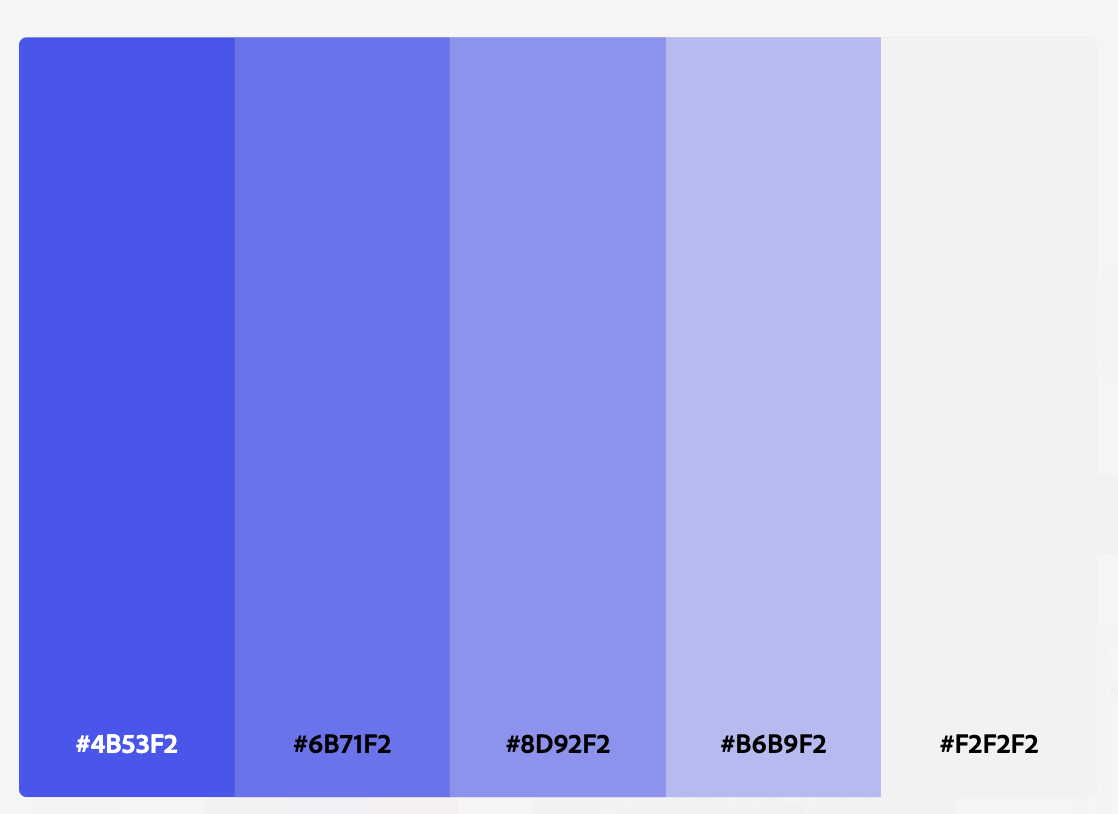

In [13]:
#Add color

color_map = {
    (9, 10): '#1B3BF2',
    (7, 8): '#4B53F2',
    (5, 6): '#6B71F2',
    (3, 4): '#8D92F2',
    (1, 2): '#B6B9F2'   
}

def map_colors(num):
        for range, color in color_map.items():
            if num in range:
                return color
            else: None

In [14]:
joined_df['properties.color'] = joined_df['headline'].apply(lambda x: map_colors(x))

In [16]:
joined_df.head()

type  id geometry.type  \
0  Feature   9  MultiPolygon   
1  Feature   9  MultiPolygon   
2  Feature   9  MultiPolygon   
3  Feature   9  MultiPolygon   
4  Feature  10  MultiPolygon   

                                geometry.coordinates properties.ABBR  \
0  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
1  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
2  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
3  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
4  [[[[-122.3360672, 37.7953338620002], [-122.302...             CAN   

   properties.DISTRICT  properties.SQ_Miles  properties.Shape_Leng  \
0   CALIFORNIA EASTERN            91785.949              32.204502   
1   CALIFORNIA EASTERN            91785.949              32.204502   
2   CALIFORNIA EASTERN            91785.949              32.204502   
3   CALIFORNIA EASTERN            91785.949              32.204502   
4  CALIFORNIA NORTHERN            26734.821              29.120485   

   properties.Shape_Area properties.District_N  properties.Shape__Are  \
0              23.632805                     9              23.632805   
1              23.632805                     9              23.632805   
2              23.632805                     9              23.632805   
3              23.632805                     9              23.632805   
4               5.579357                     9               5.579357   

   properties.Shape__Len      properties.name  headline  \
0              32.204502   California Eastern       4.0   
1              32.204502   California Eastern       4.0   
2              32.204502   California Eastern       4.0   
3              32.204502   California Eastern       4.0   
4              29.120485  California Northern       7.0   

                                             article  \
0  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...   
1  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...   
2  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...   
3  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...   
4  Judge Jacqueline Corley, Judge Trina Thompson,...   

                               properties.headline  \
0  The number of nominee/s in this district is 4.0   
1  The number of nominee/s in this district is 4.0   
2  The number of nominee/s in this district is 4.0   
3  The number of nominee/s in this district is 4.0   
4  The number of nominee/s in this district is 7.0   

                                  properties.article properties.color  
0  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...          #8D92F2  
1  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...          #8D92F2  
2  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...          #8D92F2  
3  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...          #8D92F2  
4  Judge Jacqueline Corley, Judge Trina Thompson,...          #4B53F2

In [17]:
#Add group id

def dis_num(district):
    if district == 'District of Columbia':
        return '12'
    else:
        return district


In [18]:
joined_df['properties.group_id'] = joined_df['properties.District_N'].apply(dis_num)

In [19]:
#Add group name

def dis_name(district):
    if district == 'District of Columbia':
        return district
    else:
        return "District " + district

In [20]:
joined_df['properties.group_name'] = joined_df['properties.District_N'].apply(dis_name)

In [22]:
joined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   type                   144 non-null    object 
 1   id                     144 non-null    int64  
 2   geometry.type          144 non-null    object 
 3   geometry.coordinates   144 non-null    object 
 4   properties.ABBR        144 non-null    object 
 5   properties.DISTRICT    144 non-null    object 
 6   properties.SQ_Miles    144 non-null    float64
 7   properties.Shape_Leng  144 non-null    float64
 8   properties.Shape_Area  144 non-null    float64
 9   properties.District_N  144 non-null    object 
 10  properties.Shape__Are  144 non-null    float64
 11  properties.Shape__Len  144 non-null    float64
 12  properties.name        144 non-null    object 
 13  headline               144 non-null    float64
 14  article                144 non-null    object 
 15  proper

In [24]:
#Remove duplicate columns
joined_df = joined_df.drop(columns=['headline','article'])


In [25]:
joined_df.head()

type  id geometry.type  \
0  Feature   9  MultiPolygon   
1  Feature   9  MultiPolygon   
2  Feature   9  MultiPolygon   
3  Feature   9  MultiPolygon   
4  Feature  10  MultiPolygon   

                                geometry.coordinates properties.ABBR  \
0  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
1  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
2  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
3  [[[[-121.839935303, 38.0620040890002], [-121.8...             CAE   
4  [[[[-122.3360672, 37.7953338620002], [-122.302...             CAN   

   properties.DISTRICT  properties.SQ_Miles  properties.Shape_Leng  \
0   CALIFORNIA EASTERN            91785.949              32.204502   
1   CALIFORNIA EASTERN            91785.949              32.204502   
2   CALIFORNIA EASTERN            91785.949              32.204502   
3   CALIFORNIA EASTERN            91785.949              32.204502   
4  CALIFORNIA NORTHERN            26734.821              29.120485   

   properties.Shape_Area properties.District_N  properties.Shape__Are  \
0              23.632805                     9              23.632805   
1              23.632805                     9              23.632805   
2              23.632805                     9              23.632805   
3              23.632805                     9              23.632805   
4               5.579357                     9               5.579357   

   properties.Shape__Len      properties.name  \
0              32.204502   California Eastern   
1              32.204502   California Eastern   
2              32.204502   California Eastern   
3              32.204502   California Eastern   
4              29.120485  California Northern   

                               properties.headline  \
0  The number of nominee/s in this district is 4.0   
1  The number of nominee/s in this district is 4.0   
2  The number of nominee/s in this district is 4.0   
3  The number of nominee/s in this district is 4.0   
4  The number of nominee/s in this district is 7.0   

                                  properties.article properties.color  \
0  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...          #8D92F2   
1  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...          #8D92F2   
2  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...          #8D92F2   
3  Kirk E. Sherriff, Judge Jennifer L. Thurston, ...          #8D92F2   
4  Judge Jacqueline Corley, Judge Trina Thompson,...          #4B53F2   

  properties.group_id properties.group_name  
0                   9            District 9  
1                   9            District 9  
2                   9            District 9  
3                   9            District 9  
4                   9            District 9

In [27]:
#Export as geo-date.js

ok_json = json.loads(joined_df.to_json(orient='records'))

In [28]:
ok_json

[{'type': 'Feature',
  'id': 9,
  'geometry.type': 'MultiPolygon',
  'geometry.coordinates': [[[[-121.839935303, 38.062004089],
     [-121.804634094, 38.054965973],
     [-121.822891235, 38.040565491],
     [-121.799720764, 38.028762817],
     [-121.815879822, 38.022109985],
     [-121.827804565, 38.029590607],
     [-121.839935303, 38.062004089]]],
   [[[-122.015655518, 38.087993622],
     [-122.003211975, 38.083263397],
     [-122.003501892, 38.074642181],
     [-122.019866943, 38.074306488],
     [-122.026054382, 38.084152222],
     [-122.039512634, 38.084327698],
     [-122.039871216, 38.094749451],
     [-122.015655518, 38.087993622]]],
   [[[-121.720741272, 38.08416748],
     [-121.734809875, 38.085273743],
     [-121.712516785, 38.102451324],
     [-121.714424133, 38.087909698],
     [-121.720741272, 38.08416748]]],
   [[[-122.301391602, 38.156616211],
     [-122.285942078, 38.135204315],
     [-122.288482666, 38.125171661],
     [-122.284584045, 38.114830017],
     [-122.262001

In [29]:
def process_to_geojson(file):
    geo_data = {"type": "FeatureCollection", "features":[]}
    for row in file:
        this_dict = {"type": "Feature", "properties":{}, "geometry": {}}
        for key, value in row.items():
            key_names = key.split('.')
            if key_names[0] == 'geometry':
                this_dict['geometry'][key_names[1]] = value
            if str(key_names[0]) == 'properties':
                this_dict['properties'][key_names[1]] = value
        geo_data['features'].append(this_dict)
    return geo_data

In [30]:
geo_format = process_to_geojson(ok_json)

In [31]:
geo_format

{'type': 'FeatureCollection',
 'features': [{'type': 'Feature',
   'properties': {'ABBR': 'CAE',
    'DISTRICT': 'CALIFORNIA EASTERN',
    'SQ_Miles': 91785.949,
    'Shape_Leng': 32.2045015681,
    'Shape_Area': 23.6328049619,
    'District_N': '9',
    'Shape__Are': 23.6328049619,
    'Shape__Len': 32.2045015681,
    'name': 'California Eastern',
    'headline': 'The number of nominee/s in this district is 4.0',
    'article': 'Kirk E. Sherriff, Judge Jennifer L. Thurston, Judge Daniel Calabretta, Judge Ana Isabel de Alba',
    'color': '#8D92F2',
    'group_id': '9',
    'group_name': 'District 9'},
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-121.839935303, 38.062004089],
       [-121.804634094, 38.054965973],
       [-121.822891235, 38.040565491],
       [-121.799720764, 38.028762817],
       [-121.815879822, 38.022109985],
       [-121.827804565, 38.029590607],
       [-121.839935303, 38.062004089]]],
     [[[-122.015655518, 38.087993622],
       [-122.00321197

In [32]:
# Variable name
with open('geo-data.js', 'w') as outfile:
    outfile.write("var infoData = ")

# Geojson output
with open('geo-data.js', 'a') as outfile:
    json.dump(geo_format, outfile)

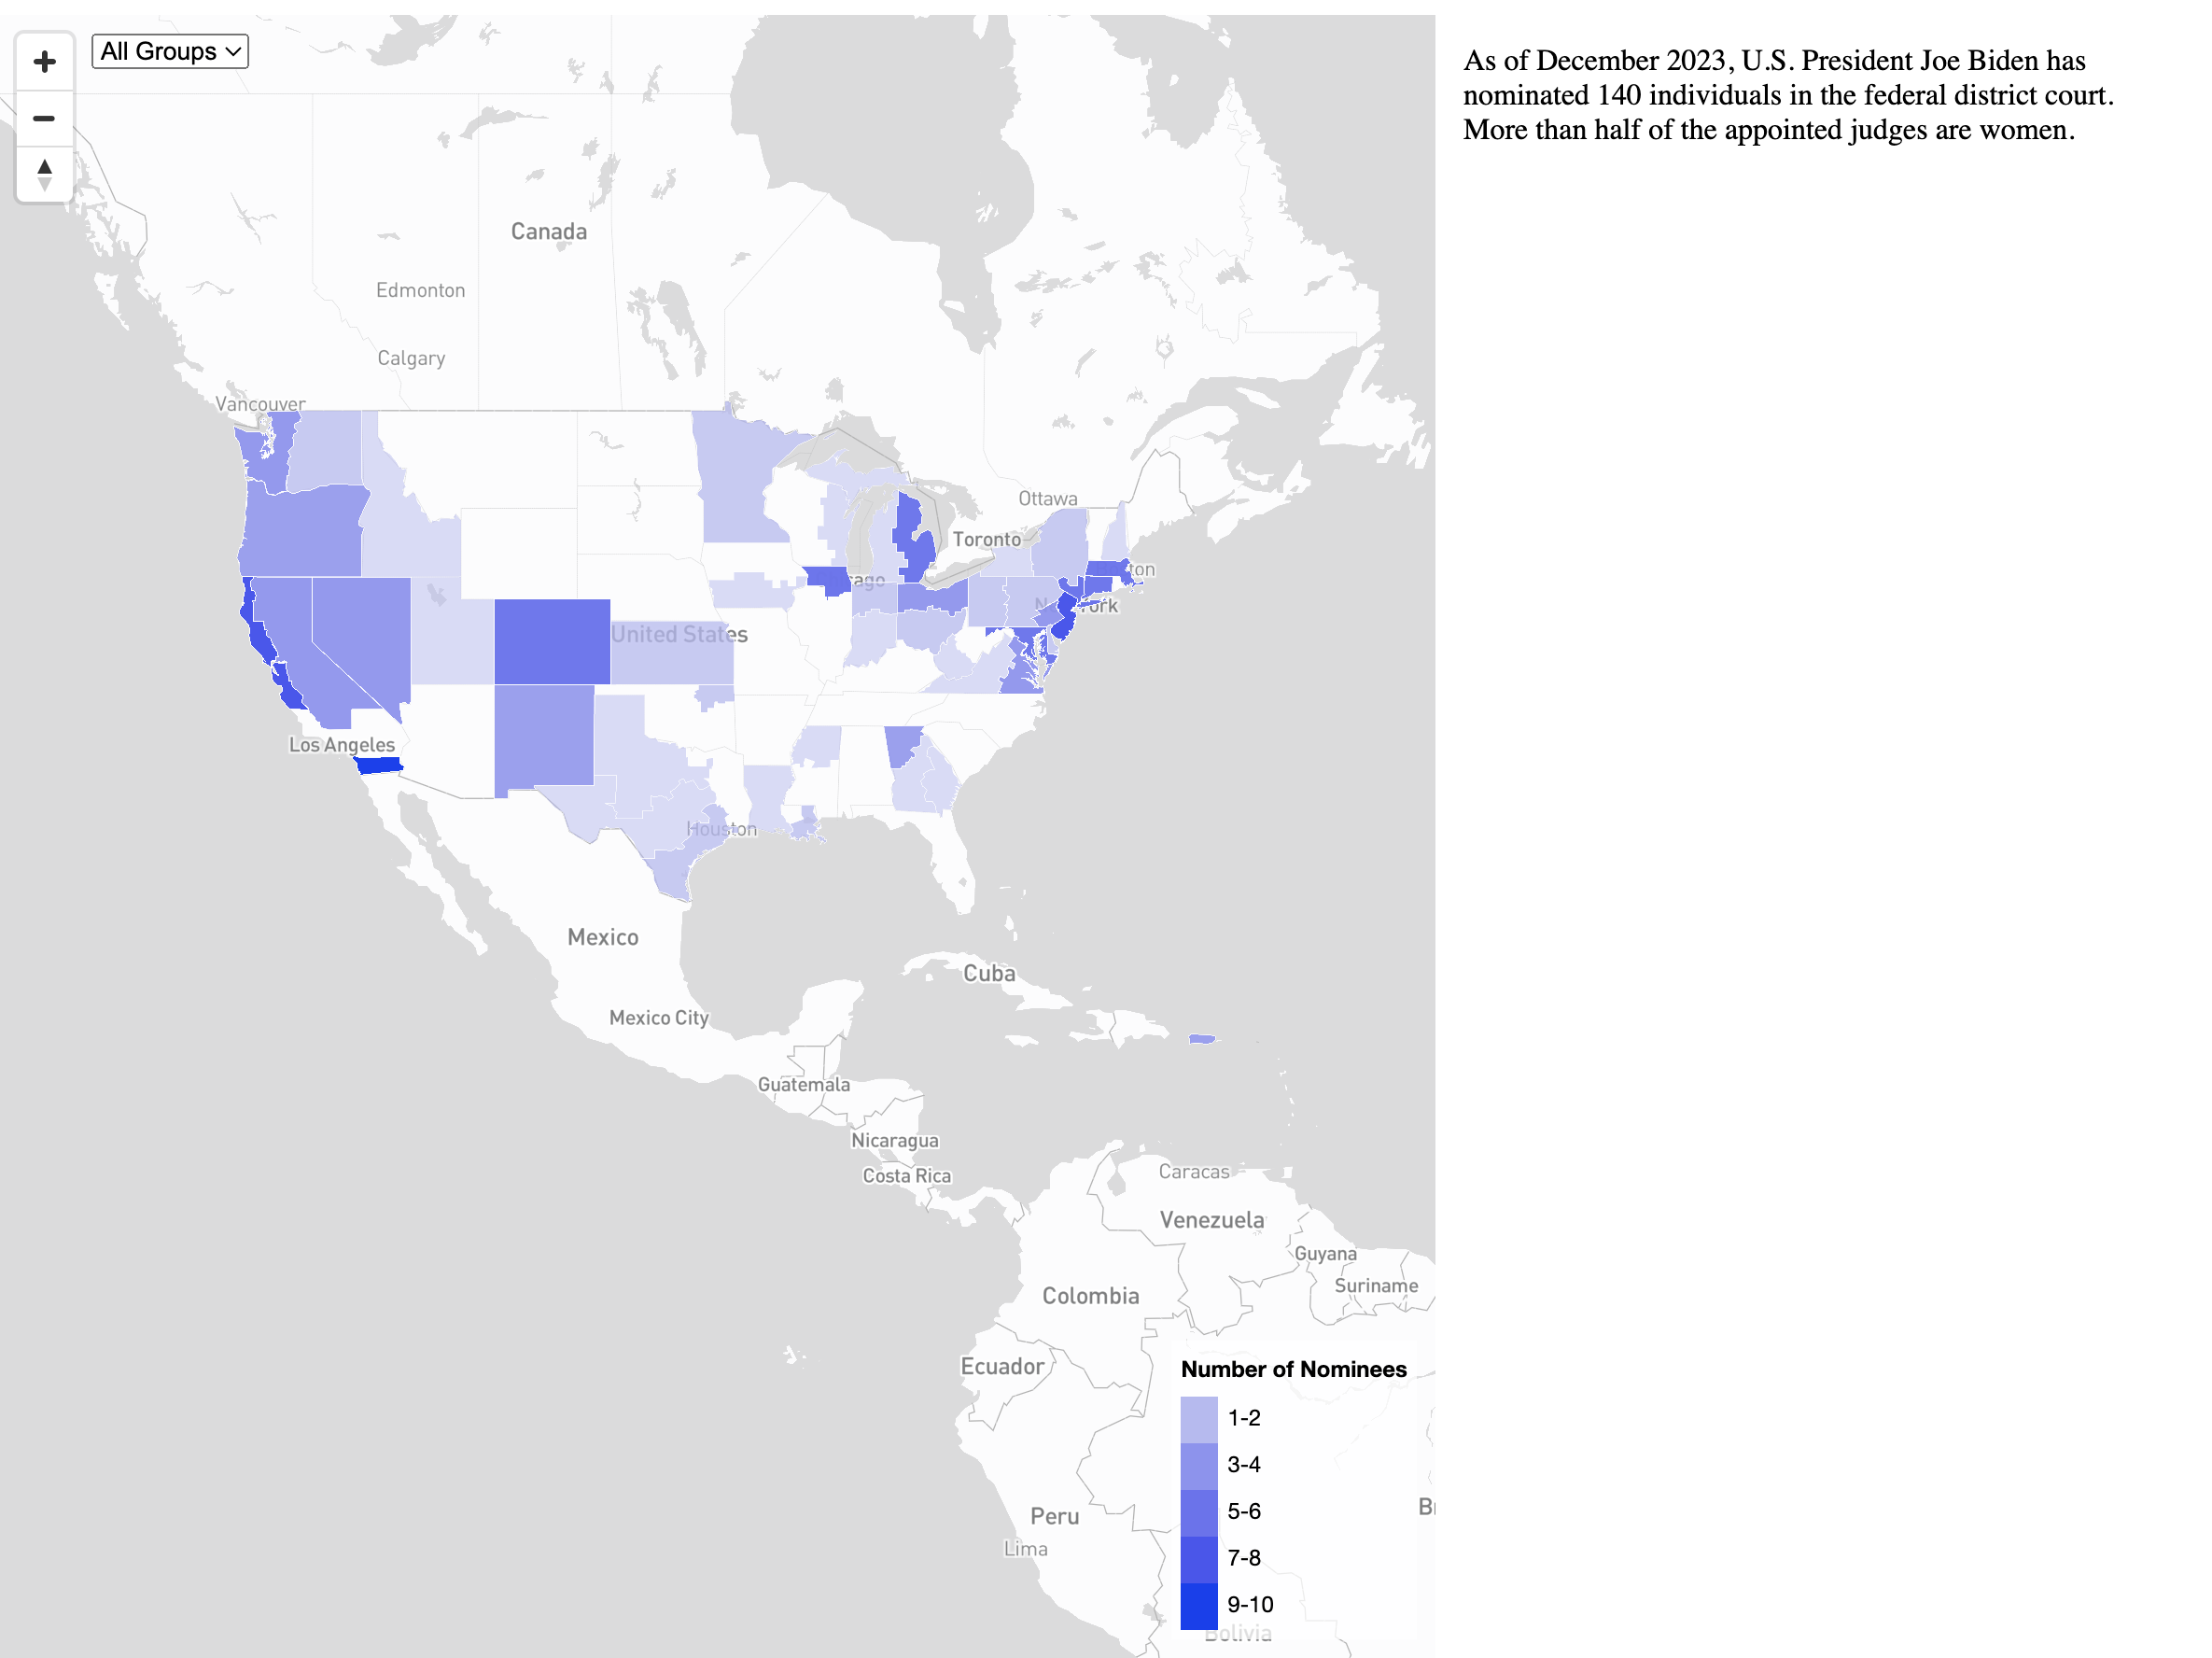